In [40]:
# Import dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Import dataset
store_df = pd.read_csv('Resources/store_data1.csv')
store_df

,id,food_category,food_department,food_family,store_sales_in_millions,store_cost_in_millions,unit_sales_in_millions,promotion_name,brand_name,SRP,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,media_type
0,0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62,"Daily Paper, Radio"
1,1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86,"Daily Paper, Radio"
2,2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16,"Daily Paper, Radio"
3,3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,Carrington,1.84,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,95.78,In-Store Coupon
4,4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,Golden,1.36,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,50.79,Radio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,60421,Specialty,Carousel,Non-Consumable,0.99,0.4554,1.0,Green Light Special,King,0.99,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,127.19,Cash Register Handout
38888,60422,Specialty,Carousel,Non-Consumable,1.21,0.4477,1.0,Unbeatable Price Savers,Toretti,1.21,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,78.45,"Sunday Paper, Radio"
38889,60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,ADJ,2.76,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,95.25,In-Store Coupon
38890,60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,Symphony,1.60,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,69.42,Sunday Paper


In [42]:
store_df['grocery_sqft'].nunique()

10

In [43]:
store_df['store_sqft'].nunique()

10

In [44]:

store_df['frozen_sqft'].nunique()

10

In [45]:
store_df['meat_sqft'].nunique()

10

In [46]:
store_df['promotion_name'].nunique()

49

In [50]:
store_df.dtypes

store_sales_in_millions    float64
store_cost_in_millions     float64
promotion_name              object
store_sqft                 float64
grocery_sqft               float64
frozen_sqft                float64
meat_sqft                  float64
cost                       float64
dtype: object

In [47]:
store_df.drop(['id', 'food_category', 'food_department', 'food_family', 'brand_name', 'SRP',''
               'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'store_city',
              'store_state', 'store_type', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'unit_sales_in_millions'], axis=1, inplace=True)
store_df

,store_sales_in_millions,store_cost_in_millions,promotion_name,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,cost
0,7.36,2.7232,Bag Stuffers,27694.0,18670.0,5415.0,3610.0,126.62
1,5.52,2.5944,Cash Register Lottery,27694.0,18670.0,5415.0,3610.0,59.86
2,3.68,1.3616,High Roller Savings,27694.0,18670.0,5415.0,3610.0,84.16
3,3.68,1.1776,Cash Register Lottery,27694.0,18670.0,5415.0,3610.0,95.78
4,4.08,1.4280,Double Down Sale,27694.0,18670.0,5415.0,3610.0,50.79
...,...,...,...,...,...,...,...,...
38887,0.99,0.4554,Green Light Special,22478.0,15321.0,4294.0,2863.0,127.19
38888,1.21,0.4477,Unbeatable Price Savers,22478.0,15321.0,4294.0,2863.0,78.45
38889,2.76,1.3248,You Save Days,22478.0,15321.0,4294.0,2863.0,95.25
38890,1.60,0.4960,Price Cutters,22478.0,15321.0,4294.0,2863.0,69.42


In [51]:
# aggregation_functions = {'store_sales_in_millions': 'mean', 'store_cost_in_millions': 'mean', 
#                          'cost': 'mean'}
# store_df_new = store_df.groupby( 'store_sqft'as_index=False).aggregate(aggregate_functions).reindex(columns=store_df.columns)

# store_df_new

TypeError: groupby() got multiple values for argument 'as_index'

In [ ]:
# grouped_multiple = df.groupby(['Team', 'Pos']).agg({'Age': ['mean', 'min', 'max']})
# grouped_multiple.columns = ['age_mean', 'age_min', 'age_max']
# grouped_multiple = grouped_multiple.reset_index()
# print(grouped_multiple)

In [52]:
store_df_new = store_df.groupby(['promotion_name', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft'])
                                .agg({'store_sales_in_millions': 'mean', 'store_cost_in_millions': 'mean', 
                                      'cost': 'mean'})

store_df_new.columns = ["avg_store_sales", "avg_store_cost", 'avg_promo_cost']

store_df_new = store_df_new.reset_index()

store_df_new


,promotion_name,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,avg_store_sales,avg_store_cost,avg_promo_cost
0,Bag Stuffers,27694.0,18670.0,5415.0,3610.0,6.543541,2.605553,115.731675
1,Bag Stuffers,28206.0,22271.0,3561.0,2374.0,3.872727,1.541100,117.930000
2,Bag Stuffers,33858.0,22123.0,7041.0,4694.0,7.122896,2.859237,70.320000
3,Best Savings,21215.0,13305.0,4746.0,3164.0,6.801399,2.736532,114.010000
4,Best Savings,23598.0,14210.0,5633.0,3755.0,6.309864,2.513045,53.820000
...,...,...,...,...,...,...,...,...
181,You Save Days,20319.0,16232.0,2452.0,1635.0,6.714152,2.692020,108.220000
182,You Save Days,22478.0,15321.0,4294.0,2863.0,2.941356,1.133556,95.250000
183,You Save Days,23598.0,14210.0,5633.0,3755.0,6.657332,2.665658,131.810000
184,You Save Days,23688.0,15337.0,5011.0,3340.0,6.738508,2.726105,131.810000


In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
store_enc = store_df_new.copy()
store_enc['promotion_name'] = le.fit_transform(store_enc['promotion_name']) 
store_enc

,promotion_name,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,avg_store_sales,avg_store_cost,avg_promo_cost
0,0,27694.0,18670.0,5415.0,3610.0,6.543541,2.605553,115.731675
1,0,28206.0,22271.0,3561.0,2374.0,3.872727,1.541100,117.930000
2,0,33858.0,22123.0,7041.0,4694.0,7.122896,2.859237,70.320000
3,1,21215.0,13305.0,4746.0,3164.0,6.801399,2.736532,114.010000
4,1,23598.0,14210.0,5633.0,3755.0,6.309864,2.513045,53.820000
...,...,...,...,...,...,...,...,...
181,48,20319.0,16232.0,2452.0,1635.0,6.714152,2.692020,108.220000
182,48,22478.0,15321.0,4294.0,2863.0,2.941356,1.133556,95.250000
183,48,23598.0,14210.0,5633.0,3755.0,6.657332,2.665658,131.810000
184,48,23688.0,15337.0,5011.0,3340.0,6.738508,2.726105,131.810000


In [55]:
# Split preprocessed data into our features and target arrays
X= store_enc.drop('avg_store_sales', axis =1) 
y= store_enc['avg_store_sales'] 

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)


In [59]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 42)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [60]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)
y_pred

array([2.67692598, 6.5519261 , 6.6326237 , 4.10346429, 6.79162927,
       6.89947365, 6.63545683, 6.40764898, 6.64948128, 3.30609763,
       3.23443966, 6.33519968, 6.37695774, 6.4760696 , 6.63904028,
       3.52939841, 6.9804096 , 3.08838036, 3.3706419 , 6.36706897,
       3.24007817, 3.57216255, 6.7757351 , 3.54285422, 6.78699374,
       6.73286728, 6.46964075, 6.75172458, 6.34359461, 6.60773245,
       6.65740936, 3.27191901, 6.80105595, 6.92032236, 2.74975007,
       3.57465253, 6.73506369, 6.56840378, 6.18494091, 6.58031721,
       6.68090863, 6.15800478, 6.77898687, 6.32929346, 6.20491144,
       6.93858586, 7.07552639])

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)


RMSE:
 0.111


<AxesSubplot:xlabel='avg_store_sales', ylabel='Predicted'>

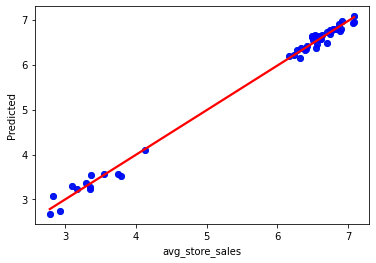

In [64]:
# Plot the result 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [66]:
# Shapes of splitted data
print(f"X_train: {X_train.shape};")
print(f"X_test: {X_test.shape};")
print(f"y_train: {y_train.shape};")
print(f"y_test: {y_test.shape};")
print(f"X: {X.shape};")
print(f"y: {y.shape};")



X_train: (139, 7);
X_test: (47, 7);
y_train: (139,);
y_test: (47,);
X: (186, 7);
y: (186,);


In [67]:
from sklearn import metrics